In [1]:
# run dependencies

import pandas as pd
from sqlalchemy import create_engine
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# only looking at teams playing in 2022 World Cup
teams_2022 = ['Qatar', 'Netherlands', 'Senegal', 'Ecuador', 
            'England', 'United States', 'Wales', 'Iran', 
            'Argentina', 'Poland', 'Mexico', 'Saudi Arabia', 
            'France', 'Denmark', 'Tunisia', 'Australia', 
            'Germany', 'Spain', 'Japan', 'Costa Rica', 
            'Belgium', 'Croatia', 'Canada', 'Morocco', 
            'Brazil', 'Switzerland', 'Serbia', 'Cameroon', 
            'Portugal', 'Uruguay', 'Ghana', 'South Korea']

In [3]:
# loading in csv
historic_csv = "../Data/matches.csv"
history = pd.read_csv(historic_csv)

# (so we can see all columns)
pd.set_option('display.max_columns', None)

history.head(10)

,key_id,tournament_id,tournament_name,match_id,match_name,stage_name,group_name,group_stage,knockout_stage,replayed,replay,match_date,match_time,stadium_id,stadium_name,city_name,country_name,home_team_id,home_team_name,home_team_code,away_team_id,away_team_name,away_team_code,score,home_team_score,away_team_score,home_team_score_margin,away_team_score_margin,extra_time,penalty_shootout,score_penalties,home_team_score_penalties,away_team_score_penalties,result,home_team_win,away_team_win,draw
0,1,WC-1930,1930 FIFA World Cup,M-1930-01,France v Mexico,group stage,Group 1,1,0,0,0,1930-07-13,15:00,S-185,Estadio Pocitos,Montevideo,Uruguay,T-28,France,FRA,T-44,Mexico,MEX,4–1,4,1,3,-3,0,0,0-0,0,0,home team win,1,0,0
1,2,WC-1930,1930 FIFA World Cup,M-1930-02,United States v Belgium,group stage,Group 4,1,0,0,0,1930-07-13,15:00,S-184,Estadio Gran Parque Central,Montevideo,Uruguay,T-79,United States,USA,T-06,Belgium,BEL,3–0,3,0,3,-3,0,0,0-0,0,0,home team win,1,0,0
2,3,WC-1930,1930 FIFA World Cup,M-1930-03,Yugoslavia v Brazil,group stage,Group 2,1,0,0,0,1930-07-14,12:45,S-184,Estadio Gran Parque Central,Montevideo,Uruguay,T-83,Yugoslavia,YUG,T-09,Brazil,BRA,2–1,2,1,1,-1,0,0,0-0,0,0,home team win,1,0,0
3,4,WC-1930,1930 FIFA World Cup,M-1930-04,Romania v Peru,group stage,Group 3,1,0,0,0,1930-07-14,14:50,S-185,Estadio Pocitos,Montevideo,Uruguay,T-58,Romania,ROU,T-54,Peru,PER,3–1,3,1,2,-2,0,0,0-0,0,0,home team win,1,0,0
4,5,WC-1930,1930 FIFA World Cup,M-1930-05,Argentina v France,group stage,Group 1,1,0,0,0,1930-07-15,16:00,S-184,Estadio Gran Parque Central,Montevideo,Uruguay,T-03,Argentina,ARG,T-28,France,FRA,1–0,1,0,1,-1,0,0,0-0,0,0,home team win,1,0,0
5,6,WC-1930,1930 FIFA World Cup,M-1930-06,Chile v Mexico,group stage,Group 1,1,0,0,0,1930-07-16,14:45,S-184,Estadio Gran Parque Central,Montevideo,Uruguay,T-13,Chile,CHL,T-44,Mexico,MEX,3–0,3,0,3,-3,0,0,0-0,0,0,home team win,1,0,0
6,7,WC-1930,1930 FIFA World Cup,M-1930-07,Yugoslavia v Bolivia,group stage,Group 2,1,0,0,0,1930-07-17,12:45,S-184,Estadio Gran Parque Central,Montevideo,Uruguay,T-83,Yugoslavia,YUG,T-07,Bolivia,BOL,4–0,4,0,4,-4,0,0,0-0,0,0,home team win,1,0,0
7,8,WC-1930,1930 FIFA World Cup,M-1930-08,United States v Paraguay,group stage,Group 4,1,0,0,0,1930-07-17,14:45,S-184,Estadio Gran Parque Central,Montevideo,Uruguay,T-79,United States,USA,T-53,Paraguay,PRY,3–0,3,0,3,-3,0,0,0-0,0,0,home team win,1,0,0
8,9,WC-1930,1930 FIFA World Cup,M-1930-09,Uruguay v Peru,group stage,Group 3,1,0,0,0,1930-07-18,14:30,S-183,Estadio Centenario,Montevideo,Uruguay,T-80,Uruguay,URY,T-54,Peru,PER,1–0,1,0,1,-1,0,0,0-0,0,0,home team win,1,0,0
9,10,WC-1930,1930 FIFA World Cup,M-1930-10,Chile v France,group stage,Group 1,1,0,0,0,1930-07-19,12:50,S-183,Estadio Centenario,Montevideo,Uruguay,T-13,Chile,CHL,T-28,France,FRA,1–0,1,0,1,-1,0,0,0-0,0,0,home team win,1,0,0


In [4]:
# converting match_date format to date_time
history['match_date'] = pd.to_datetime(history['match_date'], \
    format='%Y-%m-%d')

# only looking at World Cups after 1970
history_df =  history.loc[(history["match_date"] >= '1970-01-01')]
history_df["away_team_name"].value_counts().tail(50)

Austria                   9
Japan                     9
Scotland                  9
Peru                      9
Australia                 9
Saudi Arabia              9
Czechoslovakia            8
Romania                   8
Russia                    8
Ghana                     8
Algeria                   7
Republic of Ireland       7
Greece                    6
Ivory Coast               6
Norway                    6
Ecuador                   6
Turkey                    6
Soviet Union              6
El Salvador               6
Northern Ireland          6
Hungary                   6
Senegal                   5
New Zealand               5
Egypt                     5
Honduras                  4
Ukraine                   4
Israel                    3
Kuwait                    3
South Africa              3
Serbia                    3
Slovenia                  3
East Germany              3
Bosnia and Herzegovina    2
Iceland                   2
North Korea               2
Slovakia            

# Making dataframes based on WIN margins

In [5]:
# Looking at teams who WON at HOME games
home_scores = history_df[['home_team_name', 'home_team_score_margin',\
    'home_team_win']]
home_scores = home_scores[home_scores.home_team_win != 0]

In [6]:
# HOME TEAM MARGIN WINS (grouping by Country name)
home_avg_win_by = home_scores[["home_team_name", \
    "home_team_score_margin"]].groupby("home_team_name").mean()

# renaming columns
home_avg_win_by = home_avg_win_by.reset_index()
home_avg_win_by = home_avg_win_by.rename(columns = {'home_team_name':\
    'Country','home_team_score_margin': 'win_margin'})

home_avg_win_by.head(10)
# home_avg_win_by.value_counts

,Country,win_margin
0,Algeria,1.000000
1,Argentina,1.823529
2,Australia,1.500000
3,Austria,1.000000
4,Belgium,1.642857
5,Bosnia and Herzegovina,2.000000
6,Brazil,1.790698
7,Bulgaria,2.500000
8,Cameroon,1.000000
9,Chile,1.500000


In [7]:
# Looking at teams who WON at AWAY games
away_scores = history_df[['away_team_name', 'away_team_score_margin',\
    'away_team_win']]
away_scores = away_scores[away_scores.away_team_win != 0]

In [8]:
# AWAY TEAM MARGIN WINS
away_avg_win_by = away_scores[["away_team_name", \
    "away_team_score_margin"]].groupby("away_team_name").mean()

# Renaming columns
away_avg_win_by = away_avg_win_by.reset_index()
away_avg_win_by = away_avg_win_by.rename(columns = {'away_team_name':\
    'Country','away_team_score_margin': 'win_margin_away'})

away_avg_win_by.head(10)

,Country,win_margin_away
0,Algeria,1.500000
1,Argentina,1.000000
2,Austria,1.500000
3,Belgium,0.857143
4,Brazil,2.000000
5,Bulgaria,1.000000
6,Cameroon,1.000000
7,Chile,1.500000
8,Colombia,2.200000
9,Costa Rica,1.500000


In [9]:
# merging home and away win margings
total_win_by = pd.merge(home_avg_win_by, away_avg_win_by, on = \
    'Country')
total_win_by['win_margins'] = total_win_by['win_margin']+total_win_by\
    ['win_margin_away']

total_win_by = total_win_by[['Country', 'win_margins']]

# Making dataframes based on LOSE margins

In [10]:
# Looking at how often countries LOST at HOME games
home_losses = history_df[['home_team_name', 'home_team_score_margin',\
    'home_team_win']]
home_losses = home_losses[home_losses.home_team_win != 1]

# HOME TEAM MARGIN LOSSES (grouping by country)
home_avg_lose_by = home_losses[["home_team_name", \
    "home_team_score_margin"]].groupby("home_team_name").mean()

In [11]:
# Renaming columns
home_avg_lose_by = home_avg_lose_by.reset_index()
home_avg_lose_by = home_avg_lose_by.rename(columns = \
    {'home_team_name': 'Country','home_team_score_margin': \
    'lose_margin_home'})

home_avg_lose_by.head(10)

,Country,lose_margin_home
0,Algeria,-1.200000
1,Angola,-1.000000
2,Argentina,-1.142857
3,Australia,-1.800000
4,Austria,-1.500000
5,Belgium,-0.750000
6,Bolivia,-2.000000
7,Brazil,-1.133333
8,Bulgaria,-0.800000
9,Cameroon,-1.777778


In [12]:
# Looking at how often countries LOST at AWAY games
away_losses = history_df[['away_team_name', 'away_team_score_margin',\
    'away_team_win']]
away_losses = away_losses[away_losses.away_team_win != 1]

# AWAY TEAM MARGIN LOSSES (grouping by country)
away_avg_lose_by = away_losses[["away_team_name", \
    "away_team_score_margin"]].groupby("away_team_name").mean()

In [13]:
# Renaming columns
away_avg_lose_by = away_avg_lose_by.reset_index()
away_avg_lose_by = away_avg_lose_by.rename(columns = \
    {'away_team_name': 'Country','away_team_score_margin': \
     'loss_margin_away'})

away_avg_lose_by.head(10)

,Country,loss_margin_away
0,Algeria,-0.800000
1,Angola,0.000000
2,Argentina,-0.916667
3,Australia,-1.333333
4,Austria,-0.714286
5,Belgium,-1.153846
6,Bolivia,-0.500000
7,Bosnia and Herzegovina,-1.000000
8,Brazil,-0.666667
9,Bulgaria,-1.909091


In [14]:
# Merging home and away loss margins
total_lose_by = pd.merge(home_avg_lose_by, away_avg_lose_by, on =\
    'Country')
total_lose_by['lose_margins'] = total_lose_by['lose_margin_home']+\
    total_lose_by['loss_margin_away']
total_lose_by = total_lose_by[['Country', 'lose_margins']]

total_lose_by.head(10)

,Country,lose_margins
0,Algeria,-2.000000
1,Angola,-1.000000
2,Argentina,-2.059524
3,Australia,-3.133333
4,Austria,-2.214286
5,Belgium,-1.903846
6,Bolivia,-2.500000
7,Brazil,-1.800000
8,Bulgaria,-2.709091
9,Cameroon,-3.077778


# Merging margin wins and losses

In [15]:
# Combining both win and loss margin tables
total_score_margins = pd.merge(total_win_by, total_lose_by, on = \
    'Country', how = 'outer')

# filtering for only 2022 World Cup teams
# NOTE: QATAR HAS NEVER HAD A WORLD CUP APPEARANCE AND WALES HAS NOT APPEARED IN THE WORLD CUP SINCE 1958
total_score_margins = total_score_margins[(total_score_margins\
    ['Country'].isin(teams_2022))]

total_score_margins.head(50)

,Country,win_margins,lose_margins
1,Argentina,2.823529,-2.059524
3,Belgium,2.500000,-1.903846
4,Brazil,3.790698,-1.800000
6,Cameroon,2.000000,-3.077778
9,Costa Rica,2.000000,-2.571429
10,Croatia,2.700000,-2.142857
12,Denmark,4.333333,-2.300000
13,Ecuador,3.500000,-2.750000
14,England,3.232143,-1.064706
15,France,3.576190,-1.400000


In [16]:
new = pd.DataFrame(total_score_margins['Country'], ['Points'])

In [17]:
new.head()

,Country
Points,NaN


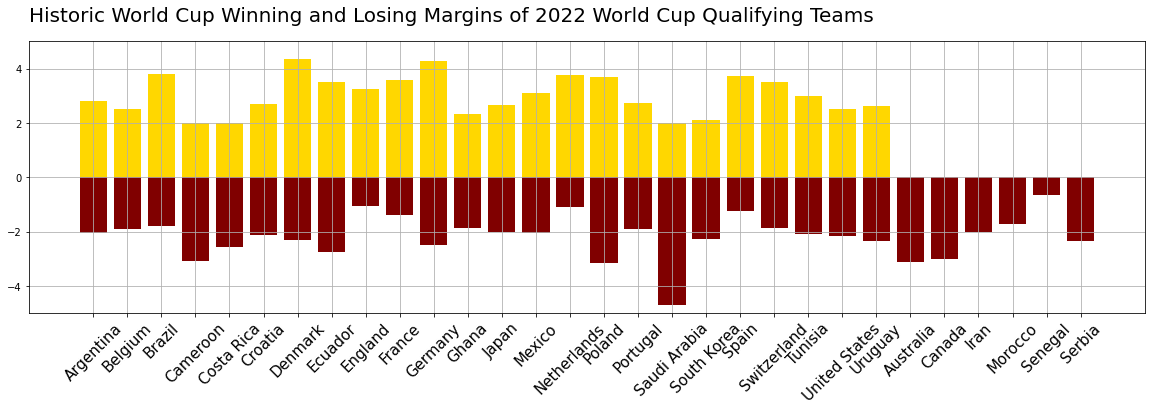

In [18]:
x = total_score_margins\
    ['Country']
y = total_score_margins['win_margins']
y2 = total_score_margins['lose_margins']

plt.figure(figsize=(20, 5))
plt.title("Historic World Cup Winning and Losing Margins of 2022 World Cup Qualifying Teams",ha = "left", fontsize = 20, x=0, pad = 20)
plt.bar(x, y, color = "gold")
plt.bar(x, y2, color = "maroon")
plt.rc("grid", linestyle =":", c = "whitesmoke" )
plt.grid(True)
plt.xticks(rotation = 45, fontsize = 15)
plt.ylim(-5,5)

plt.show()

In [19]:
# saving as CSV 
total_score_margins.to_csv("total_score_margins.csv")

# Finding total number of wins

In [20]:
# Total number of HOME wins
home_wins = history_df[["home_team_name", "home_team_win"]].\
    groupby("home_team_name").sum()

# And total AWAY wins
away_wins = history_df[["away_team_name", "away_team_win"]].\
    groupby("away_team_name").sum()

In [21]:
# Renaming index/columns
home_wins = home_wins.reset_index()
home_wins = home_wins.rename(columns= {'home_team_name': 'Country'})

away_wins = away_wins.reset_index()
away_wins = away_wins.rename(columns = {'away_team_name': 'Country', \
    'away_team_win':'Wins'})

In [22]:
# Merging tables
total_wins = pd.merge(home_wins, away_wins, on='Country',how='inner')

total_wins['total_wins'] = total_wins['home_team_win'] + total_wins\
    ['Wins']

# Only keeping teams in 2022 World Cup
total_wins = total_wins[(total_wins['Country'].isin(teams_2022))]
total_wins = total_wins[['Country', 'total_wins']]

total_wins.head(10)

,Country,total_wins
2,Argentina,39
3,Australia,2
5,Belgium,21
8,Brazil,56
10,Cameroon,4
11,Canada,0
15,Costa Rica,6
16,Croatia,13
19,Denmark,9
21,Ecuador,4


# Total games played

In [23]:
# Finding # of games played at HOME
total_played_home = history_df[["home_team_name", "match_id"]].\
    groupby("home_team_name").count()

# Finding # of games played AWAY
total_played_away = history_df[["away_team_name", "match_id"]].\
    groupby("away_team_name").count()

In [24]:
# Renaming columns
total_played_home = total_played_home.reset_index()
total_played_home = total_played_home.rename(columns = \
    {'home_team_name': 'Country','match_id': 'total_home_games'})

total_played_away = total_played_away.reset_index()
total_played_away = total_played_away.rename(columns = \
    {'away_team_name': 'Country','match_id': 'total_away_games'})

In [25]:
# Merging tables
total_games = pd.merge(total_played_home, total_played_away, on \
    = 'Country')

# Adding all total games played
total_games['total_games'] = total_played_away['total_away_games']+\
    total_played_home['total_home_games']
total_games = total_games[['Country', 'total_games']]

total_games = total_games[(total_games['Country'].isin(teams_2022))]
total_games.head(10)

,Country,total_games
2,Argentina,65.0
3,Australia,16.0
5,Belgium,42.0
8,Brazil,77.0
10,Cameroon,23.0
11,Canada,3.0
15,Costa Rica,18.0
16,Croatia,23.0
19,Denmark,20.0
21,Ecuador,10.0


# Making ratio (total wins / total played)

In [26]:
# Merging total_wins and total_games
ratio_won = pd.merge(total_wins, total_games, on = 'Country', \
    how='outer')

# Making ratio
ratio_won['ratio_won'] = ratio_won['total_wins'] / ratio_won\
    ['total_games']
ratio_won = ratio_won[(ratio_won['Country'].isin(teams_2022))]
ratio_won.head(40)

,Country,total_wins,total_games,ratio_won
0,Argentina,39,65.0,0.600000
1,Australia,2,16.0,0.125000
2,Belgium,21,42.0,0.500000
3,Brazil,56,77.0,0.727273
4,Cameroon,4,23.0,0.173913
5,Canada,0,3.0,0.000000
6,Costa Rica,6,18.0,0.333333
7,Croatia,13,23.0,0.565217
8,Denmark,9,20.0,0.450000
9,Ecuador,4,10.0,0.400000


In [27]:
# fig = plt.figure()
# fig.set_size_inches(15, 7.5)


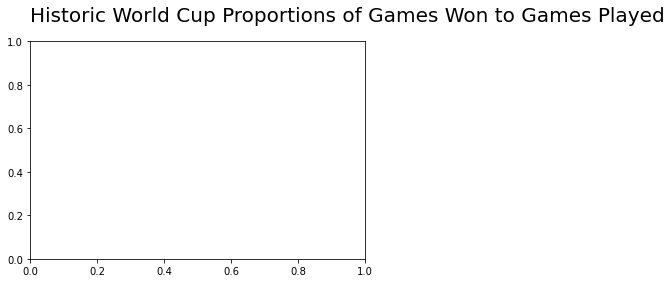

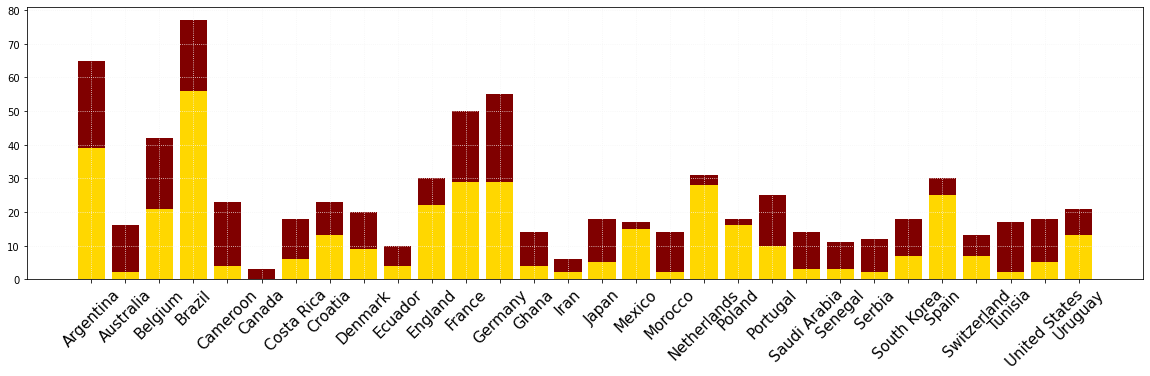

In [28]:

# plt.bar(ratio_won['Country'], ratio_won['total_games'])
# plt.bar(ratio_won['Country'], ratio_won['total_wins'], color = 'red')
# plt.set_figheight(2)
# plt.show()

x = ratio_won['Country']
y = ratio_won['total_games']
y2 = ratio_won['total_wins']

plt.title("Historic World Cup Proportions of Games Won to Games Played",ha = "left", fontsize = 20, x=0, pad = 20)
plt.figure(figsize=(20, 5))
plt.bar(x, y, color = 'maroon')
plt.bar(x, y2, color = 'gold')
plt.rc("grid", linestyle =":", c = "whitesmoke" )
plt.grid(True)
plt.xticks(rotation = 45, fontsize = 15)

plt.show()

In [29]:
# saving to a csv
ratio_won.to_csv("ratio_played_vs_won.csv")

Create a feature that calculates number of times a team has gone to the quarterfinals, semifinals, third place, or finals

In [30]:
history_df.head()

,key_id,tournament_id,tournament_name,match_id,match_name,stage_name,group_name,group_stage,knockout_stage,replayed,replay,match_date,match_time,stadium_id,stadium_name,city_name,country_name,home_team_id,home_team_name,home_team_code,away_team_id,away_team_name,away_team_code,score,home_team_score,away_team_score,home_team_score_margin,away_team_score_margin,extra_time,penalty_shootout,score_penalties,home_team_score_penalties,away_team_score_penalties,result,home_team_win,away_team_win,draw
200,201,WC-1970,1970 FIFA World Cup,M-1970-01,Mexico v Soviet Union,group stage,Group 1,1,0,0,0,1970-05-31,12:00,S-099,Estadio Azteca,Mexico City,Mexico,T-44,Mexico,MEX,T-69,Soviet Union,SUN,0–0,0,0,0,0,0,0,0-0,0,0,draw,0,0,1
201,202,WC-1970,1970 FIFA World Cup,M-1970-02,Uruguay v Israel,group stage,Group 2,1,0,0,0,1970-06-02,16:00,S-104,Estadio Cuauhtémoc,Puebla,Mexico,T-80,Uruguay,URY,T-38,Israel,ISR,2–0,2,0,2,-2,0,0,0-0,0,0,home team win,1,0,0
202,203,WC-1970,1970 FIFA World Cup,M-1970-03,England v Romania,group stage,Group 3,1,0,0,0,1970-06-02,16:00,S-095,Estadio Jalisco,Guadalajara,Mexico,T-27,England,ENG,T-58,Romania,ROU,1–0,1,0,1,-1,0,0,0-0,0,0,home team win,1,0,0
203,204,WC-1970,1970 FIFA World Cup,M-1970-04,Peru v Bulgaria,group stage,Group 4,1,0,0,0,1970-06-02,16:00,S-098,Estadio Nou Camp,León,Mexico,T-54,Peru,PER,T-10,Bulgaria,BGR,3–2,3,2,1,-1,0,0,0-0,0,0,home team win,1,0,0
204,205,WC-1970,1970 FIFA World Cup,M-1970-05,Belgium v El Salvador,group stage,Group 1,1,0,0,0,1970-06-03,16:00,S-099,Estadio Azteca,Mexico City,Mexico,T-06,Belgium,BEL,T-26,El Salvador,SLV,3–0,3,0,3,-3,0,0,0-0,0,0,home team win,1,0,0


In [31]:
#feature to count the number of times the country played in the quarterfinals, semi-finals, third-place match, or final

# Teams advancing in stages

In [32]:
adv1 = history_df.groupby(["stage_name","home_team_name"]).count()
adv1 = adv1.reset_index()
adv1 = adv1.rename(columns = {'home_team_name':'country'})
adv1

,stage_name,country,key_id,tournament_id,tournament_name,match_id,match_name,group_name,group_stage,knockout_stage,replayed,replay,match_date,match_time,stadium_id,stadium_name,city_name,country_name,home_team_id,home_team_code,away_team_id,away_team_name,away_team_code,score,home_team_score,away_team_score,home_team_score_margin,away_team_score_margin,extra_time,penalty_shootout,score_penalties,home_team_score_penalties,away_team_score_penalties,result,home_team_win,away_team_win,draw
0,final,Argentina,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
1,final,Brazil,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
2,final,France,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
3,final,Germany,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
4,final,Italy,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169,third-place match,Poland,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
170,third-place match,South Korea,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
171,third-place match,Sweden,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
172,third-place match,Uruguay,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


In [33]:
adv1 = adv1[['stage_name','country','match_id']]
adv1

,stage_name,country,match_id
0,final,Argentina,2
1,final,Brazil,3
2,final,France,1
3,final,Germany,2
4,final,Italy,2
...,...,...,...
169,third-place match,Poland,1
170,third-place match,South Korea,1
171,third-place match,Sweden,1
172,third-place match,Uruguay,1


In [34]:
adv2 = history_df.groupby(["stage_name","away_team_name"]).count()
adv2 = adv2.reset_index()
adv2 = adv2.rename(columns = {'away_team_name':'country'})
adv2

,stage_name,country,key_id,tournament_id,tournament_name,match_id,match_name,group_name,group_stage,knockout_stage,replayed,replay,match_date,match_time,stadium_id,stadium_name,city_name,country_name,home_team_id,home_team_name,home_team_code,away_team_id,away_team_code,score,home_team_score,away_team_score,home_team_score_margin,away_team_score_margin,extra_time,penalty_shootout,score_penalties,home_team_score_penalties,away_team_score_penalties,result,home_team_win,away_team_win,draw
0,final,Argentina,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
1,final,Brazil,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
2,final,Croatia,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
3,final,France,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
4,final,Italy,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,third-place match,Netherlands,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
189,third-place match,Poland,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
190,third-place match,Portugal,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
191,third-place match,Turkey,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


In [35]:
adv2 = adv2[['stage_name','country','match_id']]
adv2

,stage_name,country,match_id
0,final,Argentina,2
1,final,Brazil,1
2,final,Croatia,1
3,final,France,2
4,final,Italy,2
...,...,...,...
188,third-place match,Netherlands,1
189,third-place match,Poland,1
190,third-place match,Portugal,1
191,third-place match,Turkey,1


In [36]:
stage_count = pd.merge(adv1, adv2, on=['stage_name','country'],how='outer')
stage_count = stage_count.fillna(0)

In [37]:
stage_count['adv_counts'] = stage_count['match_id_x']+stage_count['match_id_y']
stage_count

,stage_name,country,match_id_x,match_id_y,adv_counts
0,final,Argentina,2.0,2.0,4.0
1,final,Brazil,3.0,1.0,4.0
2,final,France,1.0,2.0,3.0
3,final,Germany,2.0,0.0,2.0
4,final,Italy,2.0,2.0,4.0
...,...,...,...,...,...
216,third-place match,Croatia,0.0,1.0,1.0
217,third-place match,England,0.0,2.0,2.0
218,third-place match,France,0.0,2.0,2.0
219,third-place match,Portugal,0.0,1.0,1.0


In [38]:
adv_df = stage_count[['stage_name','country','adv_counts']]
adv_df

,stage_name,country,adv_counts
0,final,Argentina,4.0
1,final,Brazil,4.0
2,final,France,3.0
3,final,Germany,2.0
4,final,Italy,4.0
...,...,...,...
216,third-place match,Croatia,1.0
217,third-place match,England,2.0
218,third-place match,France,2.0
219,third-place match,Portugal,1.0


In [39]:
adv_df = adv_df[(adv_df['country'].isin(teams_2022))]

In [40]:
adv_df

,stage_name,country,adv_counts
0,final,Argentina,4.0
1,final,Brazil,4.0
2,final,France,3.0
3,final,Germany,2.0
5,final,Netherlands,3.0
...,...,...,...
213,semi-finals,Spain,1.0
216,third-place match,Croatia,1.0
217,third-place match,England,2.0
218,third-place match,France,2.0


In [41]:
adv_df_pivot = adv_df.pivot(index='country', columns='stage_name', values='adv_counts')
adv_df_pivot  = adv_df_pivot .fillna(0)

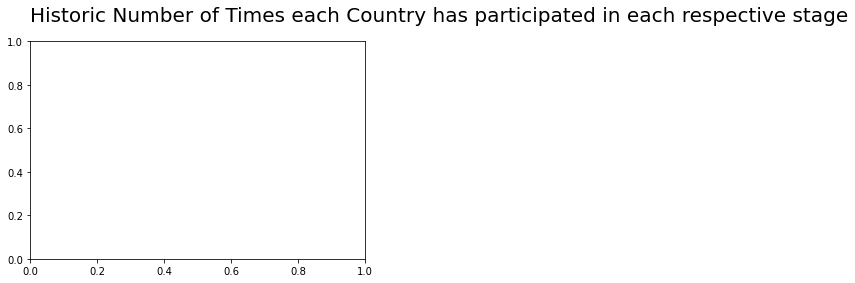

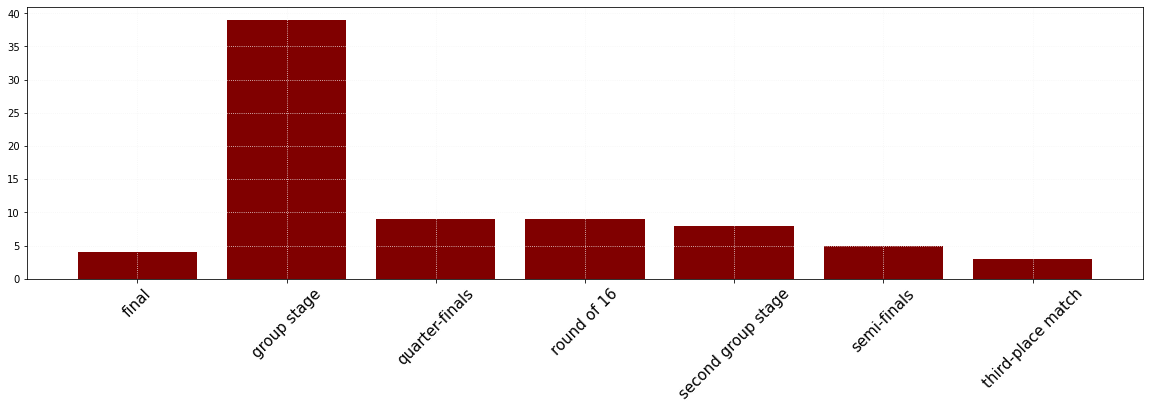

In [52]:
x = adv_df['stage_name']
y = adv_df['adv_counts']
#y2 = adv_df['country']

plt.title("Historic Number of Times each Country has participated in each respective stage",ha = "left", fontsize = 20, x=0, pad = 20)
plt.figure(figsize=(20, 5))
plt.bar(x, y, color = 'maroon')
#plt.bar(x, y2, color = 'gold')
plt.rc("grid", linestyle =":", c = "whitesmoke" )
plt.grid(True)
plt.xticks(rotation = 45, fontsize = 15)

plt.show()

In [53]:
adv_df_pivot.head()

stage_name,final,group stage,quarter-finals,round of 16,second group stage,semi-finals,third-place match
country,,,,,,,
Argentina,4.0,36.0,6.0,8.0,8.0,3.0,0.0
Australia,0.0,15.0,0.0,1.0,0.0,0.0,0.0
Belgium,0.0,27.0,3.0,6.0,2.0,2.0,2.0
Brazil,4.0,39.0,9.0,9.0,8.0,5.0,3.0
Cameroon,0.0,21.0,1.0,1.0,0.0,0.0,0.0


In [41]:
adv_df_pivot.to_csv("adv_df_pivot.csv")